In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/content/drive', force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3, 3),input_shape = (64, 64, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 30752)             0         
                                                                 
 dense_17 (Dense)            (None, 32)                984096    
                                                                 
 dense_18 (Dense)            (None, 3)                 99        
                                                                 
Total params: 985091 (3.76 MB)
Trainable params: 985091 (3.76 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
    )
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_path  = '/content/drive/My Drive/Lun_ML_Project/Image dataset/Train_Data'
test_path = '/content/drive/My Drive/Lun_ML_Project/Image dataset/Test_Data'
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Bengin': 0, 'Malignant': 1, 'metastatic': 2}

In [ ]:
validation_generator.class_indices

{'Bengin': 0, 'Malignant': 1, 'metastatic': 2}

In [ ]:
images, labels = next(train_generator)

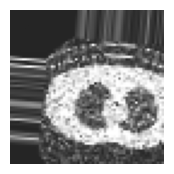

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(images[0])
plt.axis('off')
plt.show()

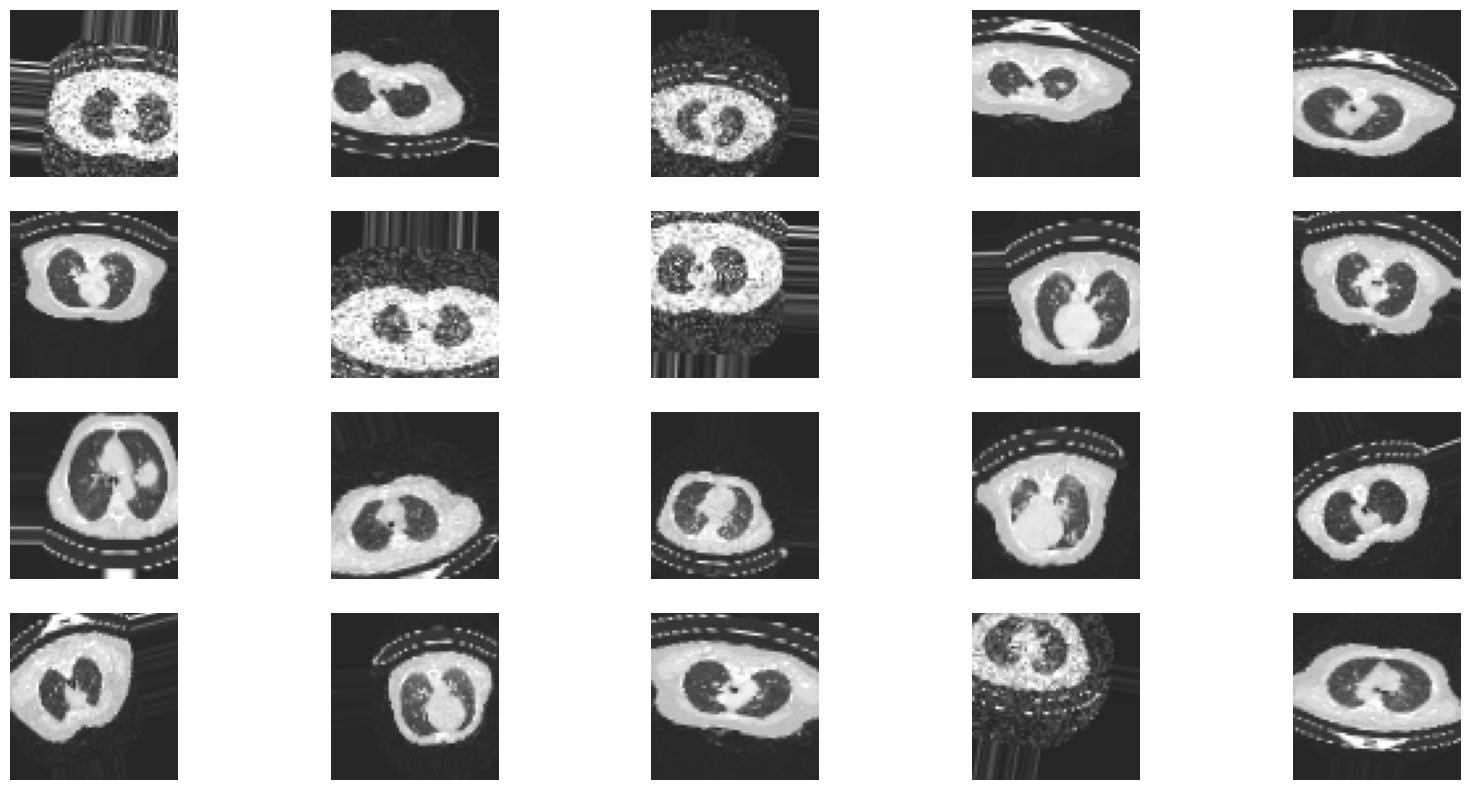

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [ ]:
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
labels_one_hot = encoder.fit_transform(labels.reshape(-1, 1))

print(labels_one_hot)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
3/3 [==============================] - 3s 1s/step - loss: 1.1130 - accuracy: 0.3523 - val_loss: 1.0617 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 2s 951ms/step - loss: 1.0900 - accuracy: 0.3409 - val_loss: 1.0743 - val_accuracy: 0.3646
Epoch 3/20
3/3 [==============================] - 2s 887ms/step - loss: 1.0934 - accuracy: 0.4062 - val_loss: 1.0769 - val_accuracy: 0.3333
Epoch 4/20
3/3 [==============================] - 4s 2s/step - loss: 1.0977 - accuracy: 0.3864 - val_loss: 1.0822 - val_accuracy: 0.3229
Epoch 5/20
3/3 [==============================] - 2s 852ms/step - loss: 1.0759 - accuracy: 0.3750 - val_loss: 1.0736 - val_accuracy: 0.3229
Epoch 6/20
3/3 [==============================] - 2s 859ms/step - loss: 1.0901 - accuracy: 0.3295 - val_loss: 1.0645 - val_accuracy: 0.3333
Epoch 7/20
3/3 [==============================] - 2s 881ms/step - loss: 1.1024 - accuracy: 0.2727 - val_loss: 1.0661 - val_accuracy: 0.3646
Epoch 8/20
3/3 [==========

In [ ]:
ypred = model.predict(validation_generator)

4/4 [==============================] - 2s 409ms/step


In [ ]:
ytest = validation_generator.labels

In [ ]:
ytest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
ypred

array([[0.46145704, 0.2623184 , 0.27622446],
       [0.49593094, 0.20372331, 0.30034566],
       [0.47261524, 0.25324535, 0.27413943],
       [0.6210228 , 0.15482517, 0.22415201],
       [0.48693338, 0.24590667, 0.26715982],
       [0.4989776 , 0.25044557, 0.25057685],
       [0.5314206 , 0.23815492, 0.23042443],
       [0.47277153, 0.2481995 , 0.27902895],
       [0.49518   , 0.20574807, 0.2990718 ],
       [0.49064955, 0.2574365 , 0.2519139 ],
       [0.4173968 , 0.28225255, 0.30035055],
       [0.42660126, 0.26043794, 0.31296083],
       [0.4514807 , 0.24571353, 0.30280575],
       [0.5226394 , 0.19984439, 0.27751628],
       [0.4506743 , 0.21556176, 0.33376396],
       [0.4635117 , 0.2666019 , 0.26988637],
       [0.4248146 , 0.278109  , 0.29707646],
       [0.4540781 , 0.25891733, 0.28700453],
       [0.48987323, 0.20142613, 0.30870062],
       [0.5084586 , 0.2405312 , 0.25101015],
       [0.5350792 , 0.20066822, 0.2642526 ],
       [0.47588292, 0.2332921 , 0.29082495],
       [0.

In [ ]:
import numpy as np
ypred = np.argmax(ypred, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.metrics import categorical_accuracy, TopKCategoricalAccuracy
Accuracy_score = accuracy_score(ytest, ypred)
categorical_accuracy = categorical_accuracy(ytest, ypred)
TopKCategoricalAccuracy = TopKCategoricalAccuracy(k=3)
#TopKCategoricalAccuracy.update_state(ytest, ypred)
print("Accuracy_score : ", Accuracy_score)
print("categorical_accuracy : ", categorical_accuracy)
print("TopKCategoricalAccuracy : ", TopKCategoricalAccuracy.result().numpy())

print(classification_report(ytest, ypred))
accuracy_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)

Accuracy_score :  0.3333333333333333
categorical_accuracy :  tf.Tensor(0.0, shape=(), dtype=float32)
TopKCategoricalAccuracy :  0.0
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        40
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        40

    accuracy                           0.33       120
   macro avg       0.11      0.33      0.17       120
weighted avg       0.11      0.33      0.17       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm

array([[40,  0,  0],
       [40,  0,  0],
       [40,  0,  0]])

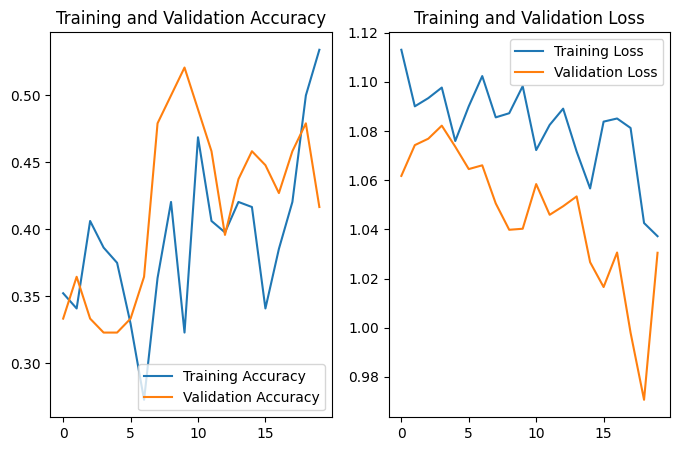

In [174]:
epochs = 20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [177]:
test_eval = model.evaluate(validation_generator, verbose=0) # verbose = 0 suppresses the evaluation output

print('Test loss: {:.2f}'.format(test_eval[0]))
print('Test accuracy: {:.2f}%'.format(test_eval[1]*100))

Test loss: 0.99
Test accuracy: 46.67%


In [187]:
model.save('LungCancerClassification-cnn.h5')